<a href="https://colab.research.google.com/github/shintaroudlotulhanafia/TugasAkhirMultipleStocks/blob/main/HP_TUNING/11_TugasAkhir_Shinta_DRLforMultipleStockTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='1'></a>
# Bagian 2. Instalasi Paket Python

<a id='1.1'></a>
## 2.1. Instalasi Paket


In [1]:
# install finrl library
!pip install git+https://github.com/shintaroudlotulhanafia/FinRL.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/shintaroudlotulhanafia/FinRL.git to /tmp/pip-req-build-2z8v5l7n
  Running command git clone -q https://github.com/shintaroudlotulhanafia/FinRL.git /tmp/pip-req-build-2z8v5l7n
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-84zkc834/pyfolio_5cf6be59cf0546468c0a35a137c3ed71
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-84zkc834/pyfolio_5cf6be59cf0546468c0a35a137c3ed71
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-84zkc834/elegantrl_d0498bda4ad744eb890bd2f59185a47e
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-84zkc834/elegantrl_d0498bda4ad744eb890bd2f59185a47e
     |████████████████████████████████| 2.3 MB 6.6 MB/s 
     |████████████████████████████████| 234 kB 86.3 MB/s 
     |██████████████████████

<a id='1.2'></a>
## 2.2. Daftar Paket Python
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Impot Paket

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


<a id='1.4'></a>
## 2.4. Membuat Folder

In [3]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Mengunduh Data

In [4]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2017-12-31'
TRADE_START_DATE = '2018-01-01'
TRADE_END_DATE = '2019-12-20'

In [5]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.JII_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-05,520.000000,520.000000,485.000000,276.809082,3.0,ADRO.JK,0
1,2009-01-05,957.573608,1049.971069,949.173828,820.693359,158999024.0,ANTM.JK,0
2,2009-01-05,61.000000,70.000000,60.000000,64.386536,95470000.0,BRPT.JK,0
3,2009-01-05,89.000000,94.000000,88.000000,73.513817,41810000.0,CPIN.JK,0
4,2009-01-05,868.023865,868.023865,868.023865,766.323181,4055.0,EXCL.JK,0


<a id='3'></a>
# Bagian 4: Memproses Data

In [7]:
INDICATORS = [
    "macd",
    "rsi_30",
    "cci_30"
]

In [8]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (2759, 8)
Successfully added vix
Successfully added turbulence index


In [9]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [10]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386536,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936809,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
3,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686646,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
4,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.0
5,2009-01-06,KLBF.JK,81.0,82.0,80.0,63.608841,44137500.0,1.0,0.000000,0.000000,-66.666667,38.560001,0.0
6,2009-01-06,SCMA.JK,16.4,16.4,16.4,8.829136,87500.0,1.0,-0.002416,0.000000,-66.666667,38.560001,0.0
7,2009-01-06,UNVR.JK,1620.0,1670.0,1600.0,1163.880127,16432500.0,1.0,0.318443,100.000000,66.666667,38.560001,0.0
8,2009-01-07,BRPT.JK,63.0,70.0,61.0,61.459877,80160000.0,2.0,-0.081304,20.547977,-100.000000,43.389999,0.0
9,2009-01-07,KLBF.JK,81.0,83.0,80.0,63.608841,166020000.0,2.0,0.000000,20.547977,0.000000,43.389999,0.0


In [11]:
processed_full.nunique()

date           2652
tic               4
open           2015
high           2064
low            2066
close          4200
volume         9087
day               5
macd          10602
rsi_30         9118
cci_30        10597
vix            1441
turbulence     2398
dtype: int64

In [12]:
processed_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10608 entries, 0 to 15999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        10608 non-null  object 
 1   tic         10608 non-null  object 
 2   open        10608 non-null  float64
 3   high        10608 non-null  float64
 4   low         10608 non-null  float64
 5   close       10608 non-null  float64
 6   volume      10608 non-null  float64
 7   day         10608 non-null  float64
 8   macd        10608 non-null  float64
 9   rsi_30      10608 non-null  float64
 10  cci_30      10608 non-null  float64
 11  vix         10608 non-null  float64
 12  turbulence  10608 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.1+ MB


In [13]:
print(processed_full['tic'].unique())

['BRPT.JK' 'KLBF.JK' 'SCMA.JK' 'UNVR.JK']


<a id='4'></a>
# Bagian 5. Membangun Lingkungan Jual-Beli Saham dengan OpenAI Gym-style

<a id='4.1'></a>
## 5.1. Memisahkan Data

In [14]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

8628
1980


In [15]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
2155,2017-12-28,UNVR.JK,10830.0,10880.0,10610.0,9620.590820,14564500.0,3.0,222.473007,67.975720,120.660062,10.18,2.575156
2156,2017-12-29,BRPT.JK,452.0,458.0,442.0,440.950226,141907000.0,4.0,2.984995,53.936637,-35.182443,11.04,6.093820
2156,2017-12-29,KLBF.JK,1670.0,1700.0,1670.0,1532.491821,40084400.0,4.0,9.240507,54.156933,136.738929,11.04,6.093820
2156,2017-12-29,SCMA.JK,490.0,498.0,476.0,457.833313,27370000.0,4.0,14.525218,58.717505,61.392004,11.04,6.093820
2156,2017-12-29,UNVR.JK,10880.0,11195.0,10875.0,9885.863281,12763000.0,4.0,243.418767,72.053361,162.612862,11.04,6.093820


In [16]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320556,-60.693762,9.77,4.101600
0,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548812,58.402814,189.233664,9.77,4.101600
0,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801605,57.193497,53.174932,9.77,4.101600
0,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.441406,12108500.0,1.0,264.456975,71.890072,158.326596,9.77,4.101600
1,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536926,133037000.0,2.0,-0.774939,47.187261,-138.640368,9.15,14.473643


In [17]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 4, State Space: 21


In [18]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 10000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

<a id='4.2'></a>
## 5.2. Lingkungan untuk Pelatihan *(Training)*



In [19]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Bagian 6: Melatih Agen DRL

In [20]:
agent = DRLAgent(env = env_train)

**Agent Training: 5 algorithms (A2C, PPO, TD3, SAC, DDPG)**

<a id='5.1'></a>
##6.1. Agen 1: A2C


In [21]:
A2C_PARAMS = {
    "n_steps": 45, 
    "ent_coef": 0.07, 
    "learning_rate": 0.0002,
}
model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 45, 'ent_coef': 0.07, 'learning_rate': 0.0002}
Using cuda device


In [22]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

--------------------------------------
| time/                 |            |
|    fps                | 308        |
|    iterations         | 100        |
|    time_elapsed       | 14         |
|    total_timesteps    | 4500       |
| train/                |            |
|    entropy_loss       | -5.69      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0002     |
|    n_updates          | 99         |
|    policy_loss        | 16.1       |
|    reward             | 0.50154495 |
|    std                | 1          |
|    value_loss         | 9.7        |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 332         |
|    iterations         | 200         |
|    time_elapsed       | 27          |
|    total_timesteps    | 9000        |
| train/                |             |
|    entropy_loss       | -5.7        |
|    explained_variance | 0           |
|    learning_ra

<a id='5.2'></a>
##6.2. Agen 2: PPO

In [23]:
PPO_PARAMS = {
    "n_steps": 50000,
    "ent_coef": 0.05,
    "learning_rate": 0.025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 50000, 'ent_coef': 0.05, 'learning_rate': 0.025, 'batch_size': 128}
Using cuda device


/usr/local/lib/python3.7/dist-packages/stable_baselines3/ppo/ppo.py:147: UserWarning: You have specified a mini-batch size of 128, but because the `RolloutBuffer` is of size `n_steps * n_envs = 50000`, after every 390 untruncated mini-batches, there will be a truncated mini-batch of size 80
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=50000 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


In [24]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

day: 2156, episode: 30
begin_total_asset: 10000000.00
end_total_asset: 26587845.54
total_reward: 16587845.54
total_cost: 789642.98
total_trades: 8488
Sharpe: 0.711
day: 2156, episode: 40
begin_total_asset: 10000000.00
end_total_asset: 21019193.69
total_reward: 11019193.69
total_cost: 784101.48
total_trades: 8428
Sharpe: 0.648
----------------------------------
| time/              |           |
|    fps             | 382       |
|    iterations      | 1         |
|    time_elapsed    | 130       |
|    total_timesteps | 50000     |
| train/             |           |
|    reward          | 1.2031927 |
----------------------------------


<a id='5.3'></a>
##6.3. Agen 3: TD3

In [25]:
TD3_PARAMS = {
    "batch_size": 10, 
    "buffer_size": 100000, 
    "learning_rate": 0.3  
}
model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 10, 'buffer_size': 100000, 'learning_rate': 0.3}
Using cuda device


In [26]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000)

day: 2156, episode: 50
begin_total_asset: 10000000.00
end_total_asset: 37698958.50
total_reward: 27698958.50
total_cost: 16209.38
total_trades: 3774
Sharpe: 0.626
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 149       |
|    time_elapsed    | 57        |
|    total_timesteps | 8628      |
| train/             |           |
|    actor_loss      | 1.03e+07  |
|    critic_loss     | 5.98e+13  |
|    learning_rate   | 0.3       |
|    n_updates       | 6471      |
|    reward          | 31.885468 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 134       |
|    time_elapsed    | 128       |
|    total_timesteps | 17256     |
| train/             |           |
|    actor_loss      | 1.77e+07  |
|    critic_loss     | 2.44e+12  |
|    learning_rate   | 0.3       |
|    n_updates       | 15099    

<a id='5.4'></a>
##6.4. Agen 4: SAC

In [27]:
SAC_PARAMS = {
    "ent_coef": 1.05,
    "learning_rate": 0.0001,
    "batch_size": 25,
    "buffer_size": 100000,
    "learning_starts": 100,
    
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'ent_coef': 1.05, 'learning_rate': 0.0001, 'batch_size': 25, 'buffer_size': 100000, 'learning_starts': 100}
Using cuda device


In [28]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 79        |
|    time_elapsed    | 108       |
|    total_timesteps | 8628      |
| train/             |           |
|    actor_loss      | 3.47e+03  |
|    critic_loss     | 9.78e+03  |
|    ent_coef        | 1.05      |
|    learning_rate   | 0.0001    |
|    n_updates       | 8527      |
|    reward          | 221.79362 |
----------------------------------
day: 2156, episode: 80
begin_total_asset: 10000000.00
end_total_asset: 86129068.86
total_reward: 76129068.86
total_cost: 11820.65
total_trades: 4463
Sharpe: 1.008
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 79        |
|    time_elapsed    | 217       |
|    total_timesteps | 17256     |
| train/             |           |
|    actor_loss      | 5.88e+03  |
|    critic_loss     | 6.94e+05  |
|    ent_coef        | 1.05     

<a id='5.5'></a>
##6.5. Agen 5: DDPG

In [29]:
DDPG_PARAMS = {
    "batch_size": 160, 
    "buffer_size": 50000, 
    "learning_rate": 0.0008
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 160, 'buffer_size': 50000, 'learning_rate': 0.0008}
Using cuda device


In [30]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=60000)

day: 2156, episode: 90
begin_total_asset: 10000000.00
end_total_asset: 65843665.41
total_reward: 55843665.41
total_cost: 9989.86
total_trades: 2156
Sharpe: 0.867
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 139       |
|    time_elapsed    | 61        |
|    total_timesteps | 8628      |
| train/             |           |
|    actor_loss      | 359       |
|    critic_loss     | 1.02e+06  |
|    learning_rate   | 0.0008    |
|    n_updates       | 6471      |
|    reward          | 19.480055 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 124       |
|    time_elapsed    | 139       |
|    total_timesteps | 17256     |
| train/             |           |
|    actor_loss      | 711       |
|    critic_loss     | 3.62e+03  |
|    learning_rate   | 0.0008    |
|    n_updates       | 15099     

<a id='6'></a>
# Bagian 7: Melakukan Jual-Beli

<a id='6.1'></a>
## 7.1. Performa di Dalam Sampel

Asumsikan modal awal adalah Rp10.000.000.

In [31]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [32]:
insample_risk_indicator.vix.describe()

count    2157.000000
mean       18.666583
std         7.813415
min         9.140000
25%        13.370000
50%        16.299999
75%        21.540001
max        56.650002
Name: vix, dtype: float64

In [33]:
insample_risk_indicator.vix.quantile(0.996)

48.84047967529307

In [34]:
insample_risk_indicator.turbulence.describe()

count    2157.000000
mean        3.743612
std         7.235652
min         0.000000
25%         0.635787
50%         1.864083
75%         4.227539
max       119.398913
Name: turbulence, dtype: float64

In [35]:
insample_risk_indicator.turbulence.quantile(0.996)

46.73229531159317

<a id='6.2'></a>
##7.2. Performa di Luar Sampel

In [36]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [37]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320556,-60.693762,9.77,4.101600
0,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548812,58.402814,189.233664,9.77,4.101600
0,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801605,57.193497,53.174932,9.77,4.101600
0,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.441406,12108500.0,1.0,264.456975,71.890072,158.326596,9.77,4.101600
1,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536926,133037000.0,2.0,-0.774939,47.187261,-138.640368,9.15,14.473643


<a id='6.3'></a>
##7.3. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi

<a id='6.3.1'></a>
###7.3.1. Agen 1: A2C

In [38]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym)

hit end!


<a id='6.3.2'></a>
###7.3.2. Agen 2: PPO

In [39]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym)

hit end!


<a id='6.3.3'></a>
###7.3.3. Agen 3: TD3

In [40]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym)

hit end!


<a id='6.3.4'></a>
###7.3.4. Agen 4: SAC

In [41]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

hit end!


<a id='6.3.5'></a>
###7.3.5. Agen 5: DDPG

In [42]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!


<a id='7'></a>
# Bagian 8: Performa Backtesting
Backtesting memiliki peran kunci dalam mengevaluasi kinerja strategi perdagangan. Alat backtesting otomatis lebih disukai karena dapat meminimalisir kesalahan manusia. Backtesting dapat dilakukan dengan menggunakan paket Quantopian pyfolio untuk menguji strategi perdagangan pada notebook ini. Backtesting tersebut mudah digunakan dan terdiri dari berbagai plot yang memberikan gambaran komprehensif tentang kinerja strategi perdagangan.

<a id='7.1'></a>
## 8.1 Status BackTesting


###8.1.1 Agen A2C

In [43]:
print("===========Get Backtest Results of A2C Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_a2c_"+now+'.csv')

===========Get Backtest Results of A2C Model===========
Annual return          0.115433
Cumulative returns     0.239345
Annual volatility      0.141001
Sharpe ratio           0.846195
Calmar ratio           0.794651
Stability              0.069852
Max drawdown          -0.145262
Omega ratio            1.190513
Sortino ratio          1.452526
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.118267
Daily value at risk   -0.017291
dtype: float64


###8.1.2 Agen PPO

In [44]:
print("===========Get Backtest Results of PPO Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ppo_"+now+'.csv')

===========Get Backtest Results of PPO Model===========
Annual return         -0.091220
Cumulative returns    -0.171293
Annual volatility      0.241442
Sharpe ratio          -0.276550
Calmar ratio          -0.320147
Stability              0.147734
Max drawdown          -0.284932
Omega ratio            0.951585
Sortino ratio         -0.393649
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.005256
Daily value at risk   -0.030684
dtype: float64


###8.1.3 Agen TD3

In [45]:
print("===========Get Backtest Results of TD3 Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_td3)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_td3_"+now+'.csv')

===========Get Backtest Results of TD3 Model===========
Annual return         -0.138460
Cumulative returns    -0.253787
Annual volatility      0.320662
Sharpe ratio          -0.306905
Calmar ratio          -0.298193
Stability              0.807714
Max drawdown          -0.464329
Omega ratio            0.944050
Sortino ratio         -0.468994
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.137156
Daily value at risk   -0.040790
dtype: float64


###8.1.4 Agen SAC

In [46]:
print("===========Get Backtest Results of SAC Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_sac)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_sac_"+now+'.csv')

===========Get Backtest Results of SAC Model===========
Annual return         -0.116070
Cumulative returns    -0.215218
Annual volatility      0.245540
Sharpe ratio          -0.380925
Calmar ratio          -0.407919
Stability              0.230936
Max drawdown          -0.284543
Omega ratio            0.934331
Sortino ratio         -0.538144
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.990686
Daily value at risk   -0.031306
dtype: float64


###8.1.5 Agen DDPG

In [47]:
print("===========Get Backtest Results of DDPG Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ddpg_"+now+'.csv')

===========Get Backtest Results of DDPG Model===========
Annual return          0.027836
Cumulative returns     0.055411
Annual volatility      0.311376
Sharpe ratio           0.243312
Calmar ratio           0.103258
Stability              0.203163
Max drawdown          -0.269572
Omega ratio            1.047087
Sortino ratio          0.357688
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.046743
Daily value at risk   -0.038929
dtype: float64


In [48]:
#baseline stats
print("===========Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^JKII", 
        start = df_account_value_a2c.loc[0,'date'],
        end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

===========Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)
Annual return         -0.041972
Cumulative returns    -0.078113
Annual volatility      0.185511
Sharpe ratio          -0.138819
Calmar ratio          -0.175216
Stability              0.093175
Max drawdown          -0.239543
Omega ratio            0.977818
Sortino ratio         -0.189296
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.900451
Daily value at risk   -0.023474
dtype: float64


In [49]:
df_account_value_a2c.loc[0,'date']

'2018-01-02'

In [50]:
df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date']

'2019-12-18'

<a id='7.2'></a>
## 8.2 Gambaran BackTesting

###8.2.1 Agen A2C

===========A2C Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,11.543%
Cumulative returns,23.935%
Annual volatility,14.1%
Sharpe ratio,0.85
Calmar ratio,0.79
Stability,0.07
Max drawdown,-14.526%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.53,2019-05-02,2019-08-22,2019-09-11,95
1,12.49,2019-09-11,2019-10-10,2019-11-18,49
2,9.37,2018-03-13,2018-10-26,2019-04-10,282
3,3.52,2019-11-19,2019-11-22,2019-11-27,7
4,1.19,2019-04-18,2019-04-23,2019-04-29,8


Stress Events,mean,min,max
New Normal,0.05%,-2.43%,6.57%


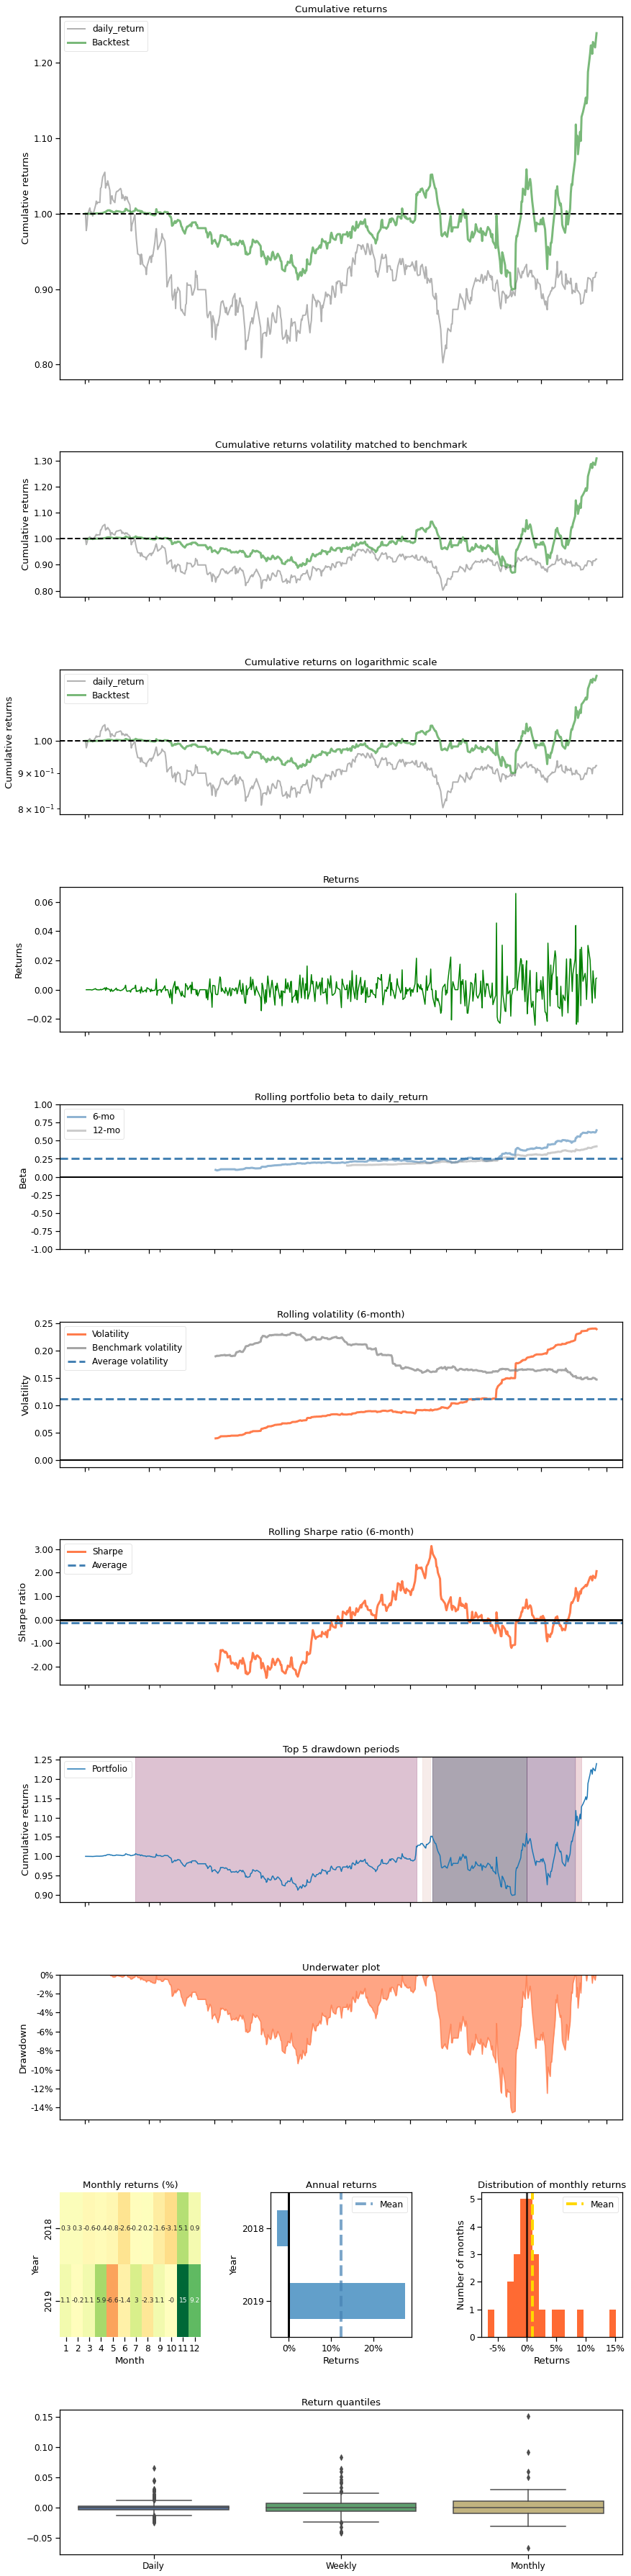

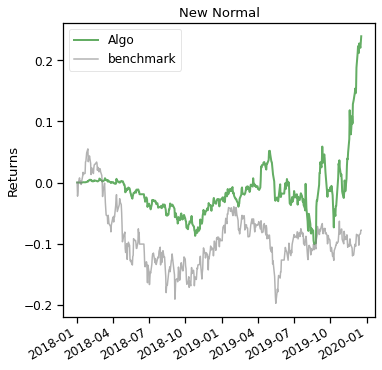

In [51]:
print("===========A2C Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_a2c, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_a2c.loc[0,'date'],
             baseline_end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

###8.2.2. Agen PPO

===========PPO Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,-9.122%
Cumulative returns,-17.129%
Annual volatility,24.144%
Sharpe ratio,-0.28
Calmar ratio,-0.32
Stability,0.15
Max drawdown,-28.493%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.49,2018-01-24,2018-11-12,NaT,NaN
1,1.15,2018-01-16,2018-01-18,2018-01-23,6
2,0.81,2018-01-08,2018-01-09,2018-01-11,4
3,0.56,2018-01-02,2018-01-04,2018-01-08,5
4,0.19,2018-01-11,2018-01-12,2018-01-16,4


Stress Events,mean,min,max
New Normal,-0.03%,-5.47%,5.66%


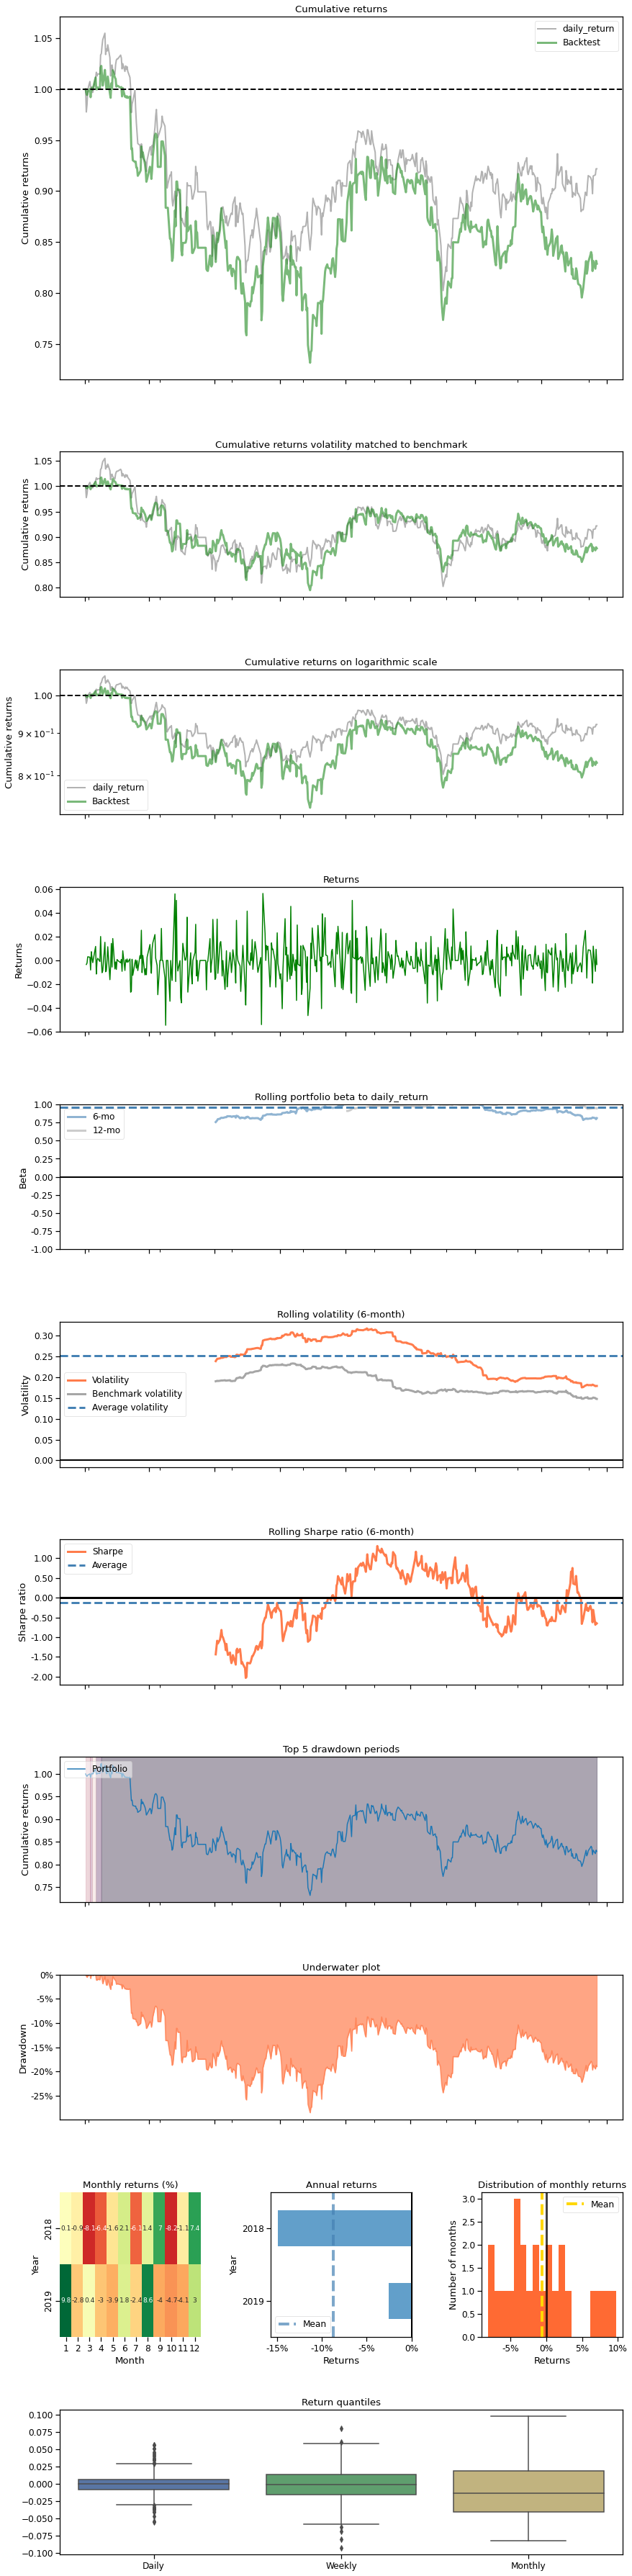

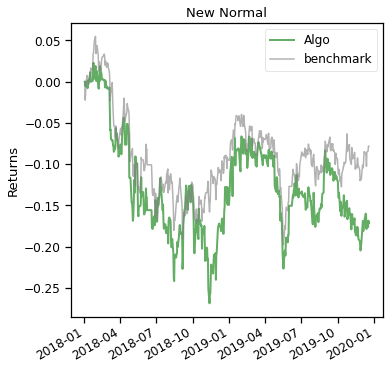

In [52]:
print("===========PPO Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ppo, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ppo.loc[0,'date'],
             baseline_end = df_account_value_ppo.loc[len(df_account_value_ppo)-1,'date'])

###8.2.3. Agen TD3

===========TD3 Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,-13.846%
Cumulative returns,-25.379%
Annual volatility,32.066%
Sharpe ratio,-0.31
Calmar ratio,-0.30
Stability,0.81
Max drawdown,-46.433%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,46.43,2018-03-13,2019-10-10,NaT,NaN
1,1.43,2018-02-27,2018-03-06,2018-03-13,11
2,1.15,2018-02-05,2018-02-23,2018-02-27,17
3,0.15,2018-01-05,2018-01-12,2018-01-16,8
4,0.14,2018-01-29,2018-01-30,2018-01-31,3


Stress Events,mean,min,max
New Normal,-0.04%,-5.46%,8.70%


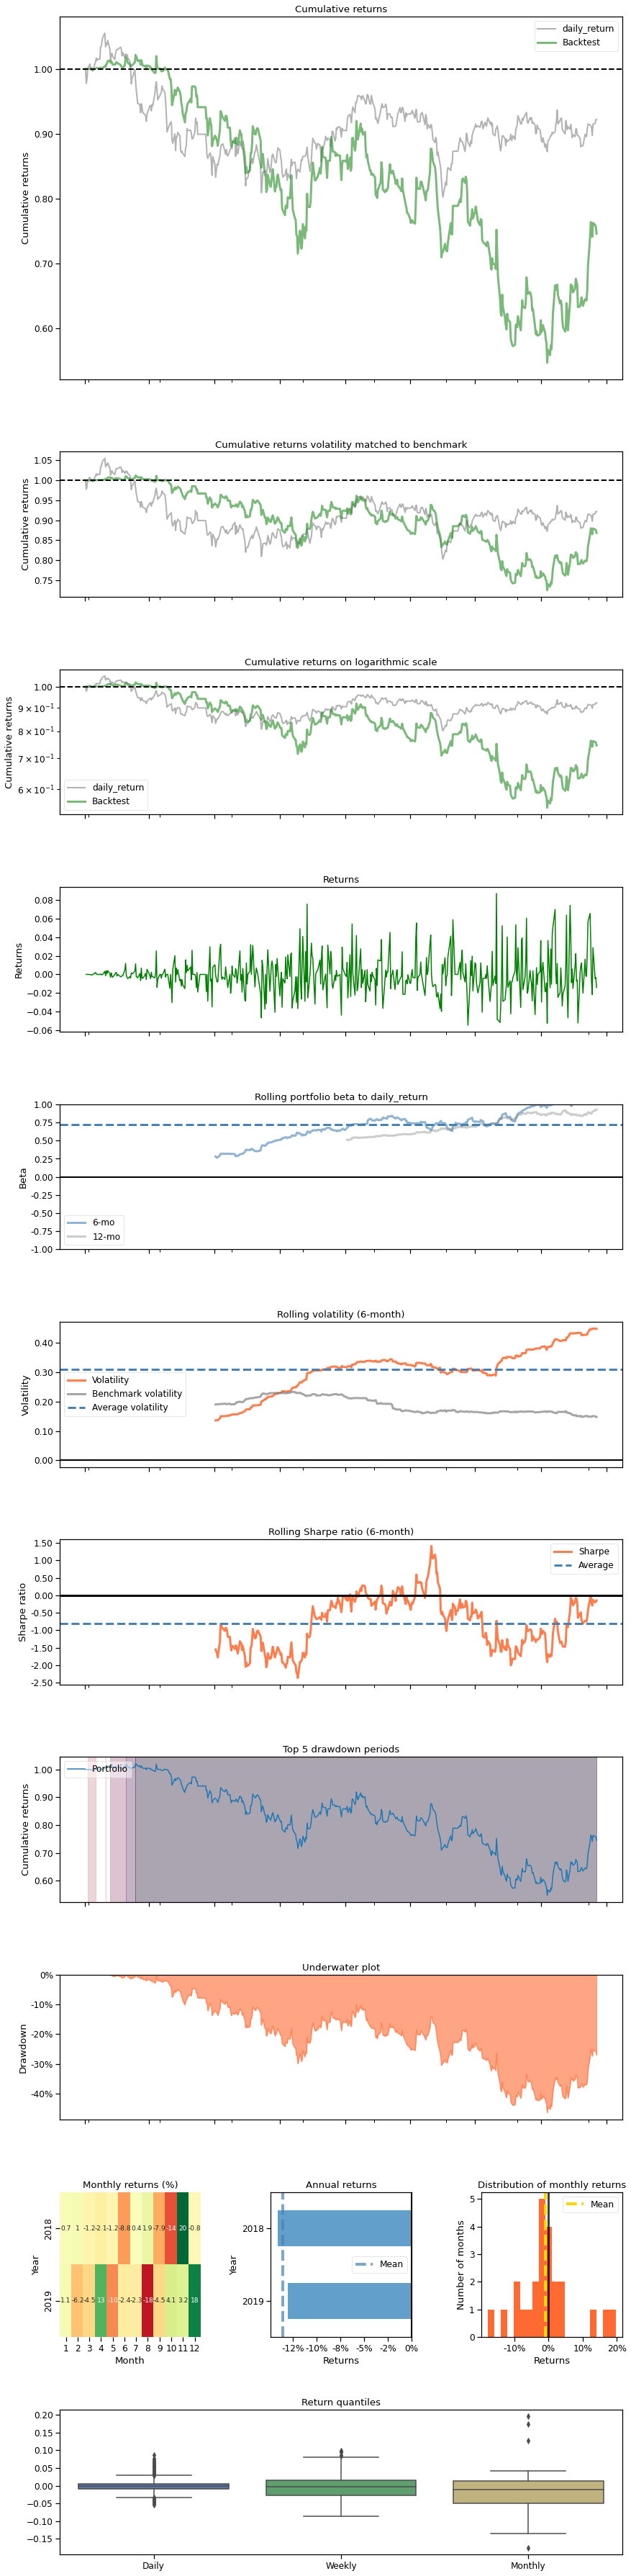

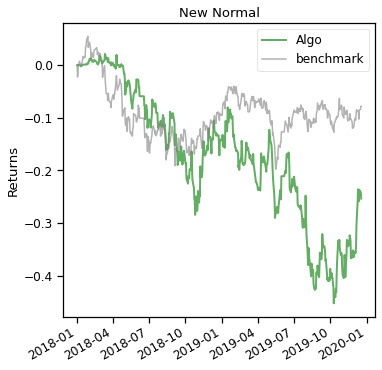

In [53]:
print("===========TD3 Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_td3, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_td3.loc[0,'date'],
             baseline_end = df_account_value_td3.loc[len(df_account_value_td3)-1,'date'])

###8.2.4. Agen SAC

============SAC Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,-11.607%
Cumulative returns,-21.522%
Annual volatility,24.554%
Sharpe ratio,-0.38
Calmar ratio,-0.41
Stability,0.23
Max drawdown,-28.454%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.45,2018-02-09,2018-11-12,NaT,NaN
1,2.38,2018-01-24,2018-02-06,2018-02-09,13
2,1.13,2018-01-16,2018-01-17,2018-01-23,6
3,0.79,2018-01-02,2018-01-09,2018-01-16,11
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,-0.04%,-5.45%,5.60%


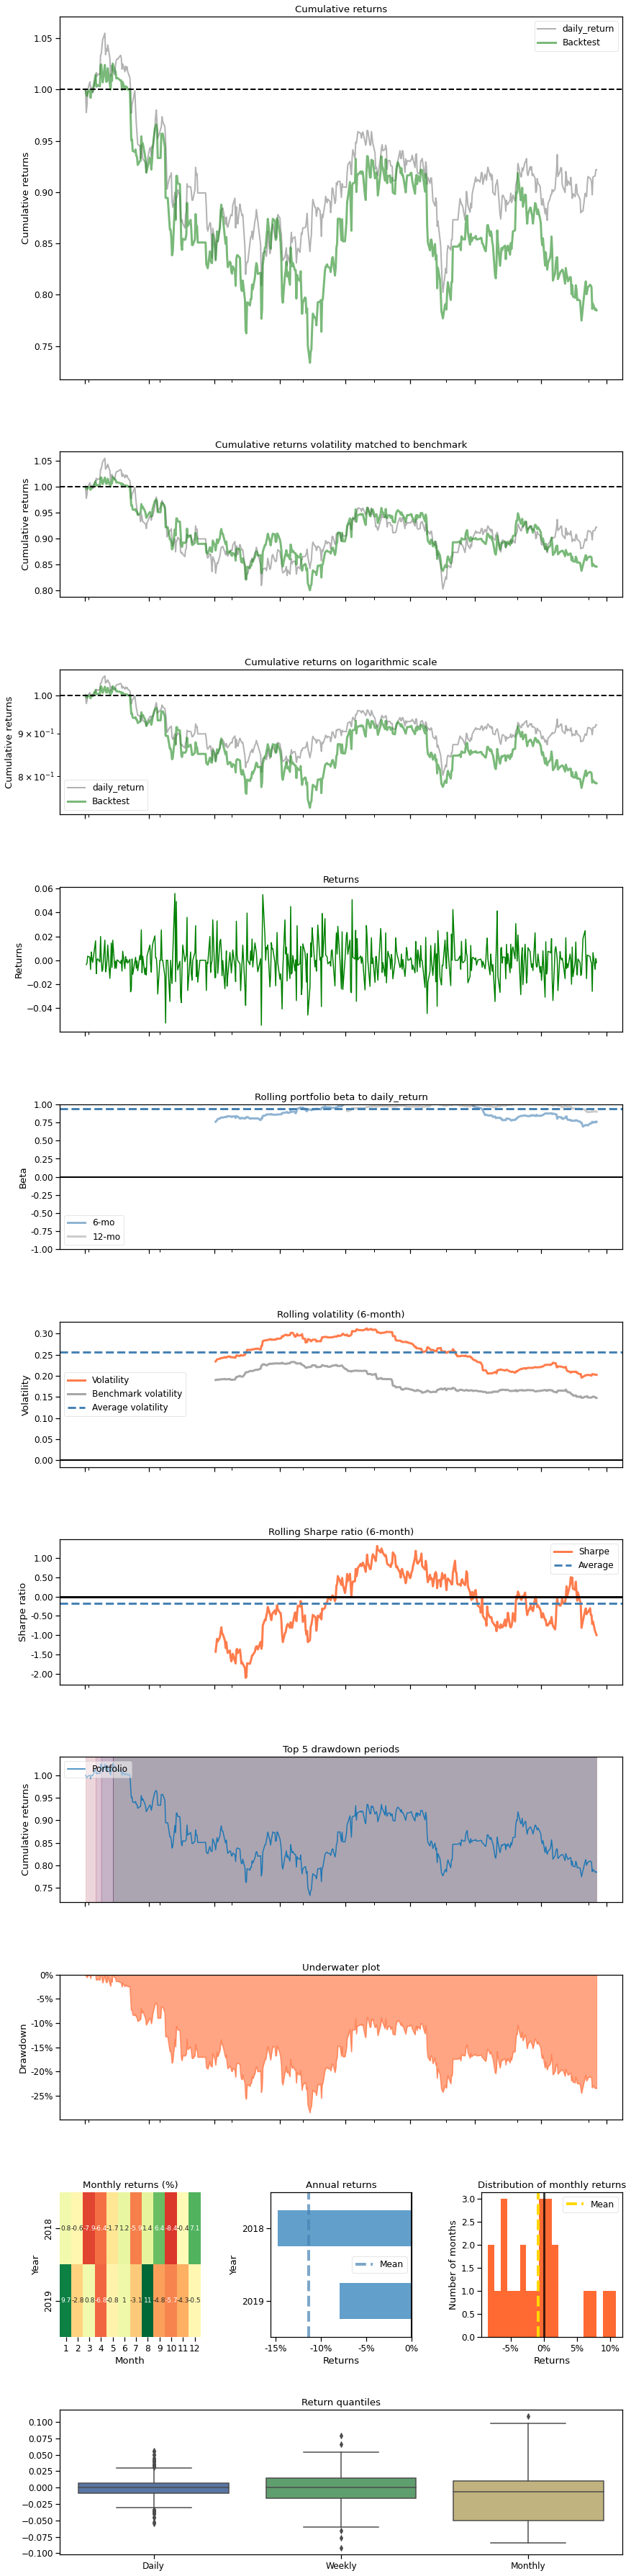

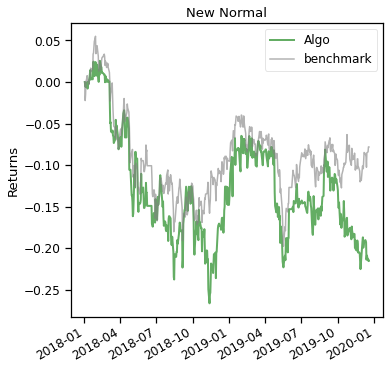

In [54]:
print("============SAC Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_sac, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_sac.loc[0,'date'],
             baseline_end = df_account_value_sac.loc[len(df_account_value_sac)-1,'date'])

###8.2.5. Agen DDPG

===========DDPG Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,2.784%
Cumulative returns,5.541%
Annual volatility,31.138%
Sharpe ratio,0.24
Calmar ratio,0.10
Stability,0.20
Max drawdown,-26.957%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,26.96,2018-01-08,2018-06-28,2018-11-26,231
1,22.94,2019-01-15,2019-05-17,2019-08-22,158
2,10.70,2018-12-07,2018-12-18,2019-01-15,28
3,10.65,2019-08-30,2019-11-14,NaT,NaN
4,5.28,2018-11-26,2018-11-30,2018-12-06,9


Stress Events,mean,min,max
New Normal,0.03%,-7.17%,8.64%


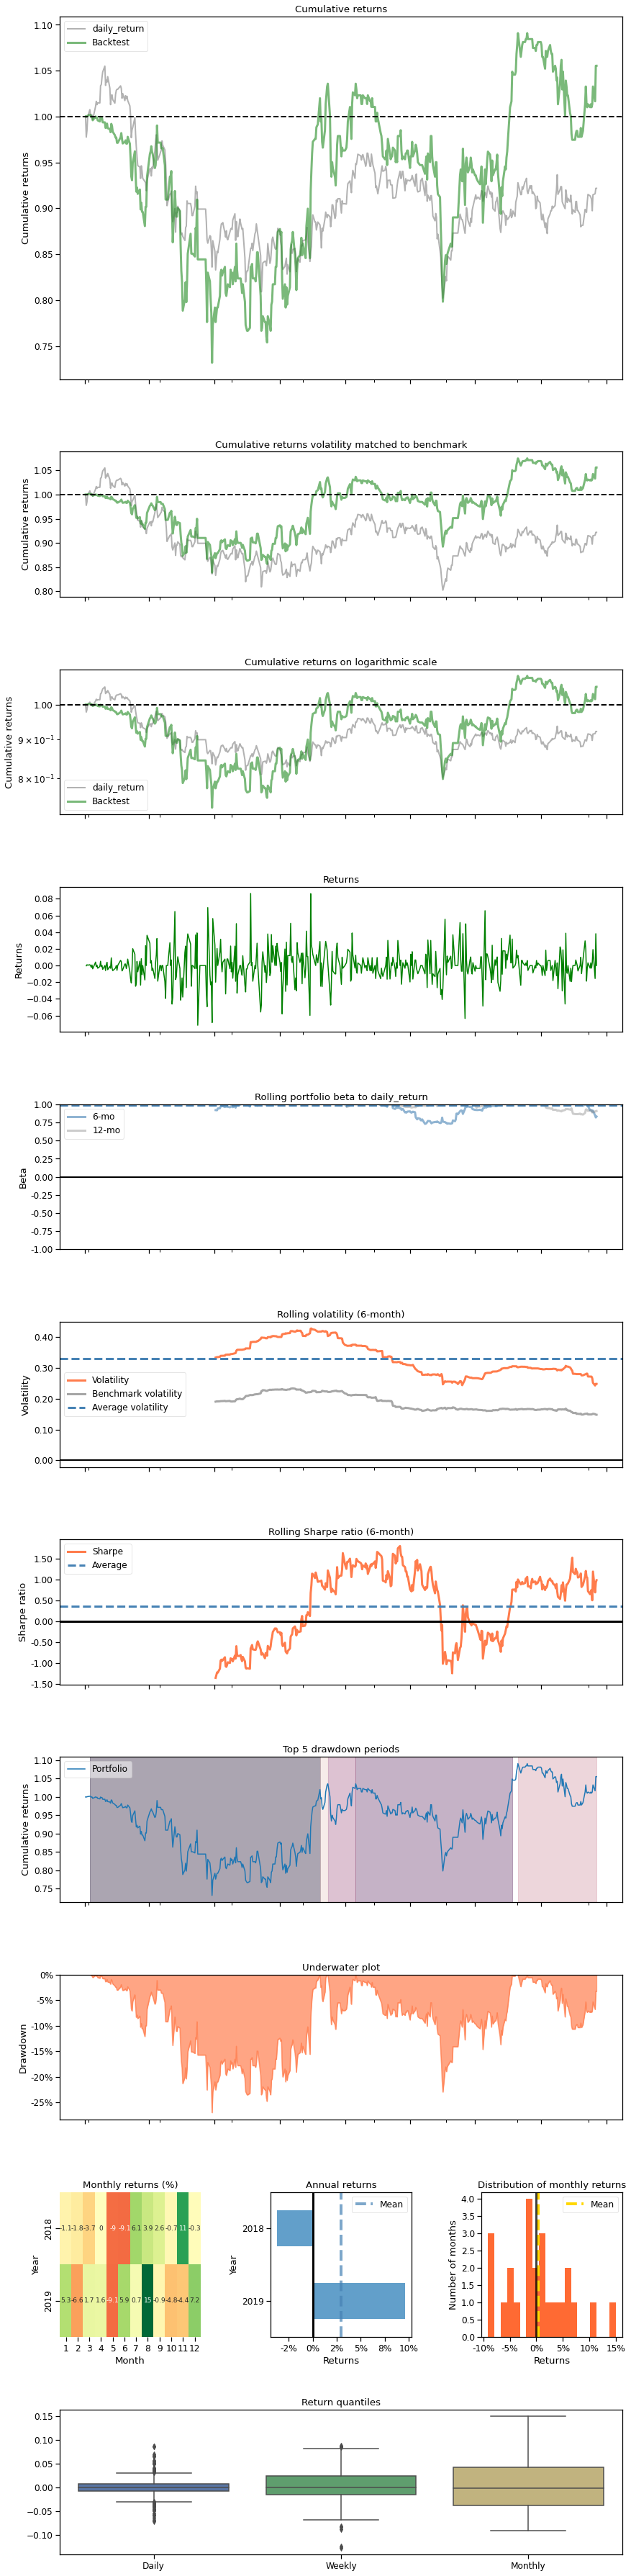

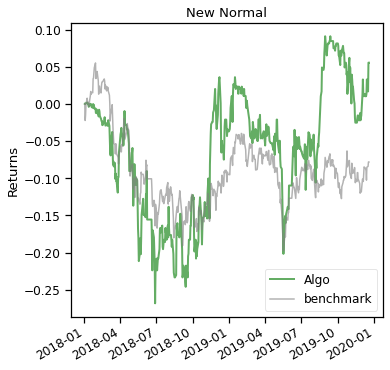

In [55]:
print("===========DDPG Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ddpg, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ddpg.loc[0,'date'],
             baseline_end = df_account_value_ddpg.loc[len(df_account_value_ddpg)-1,'date'])